# STOCK PREDICTION USING RNN

RNN :
    Recurrent neural network are in the family of feed forward neural network. The are different from
other feedforward network in their ability to send information over time steps

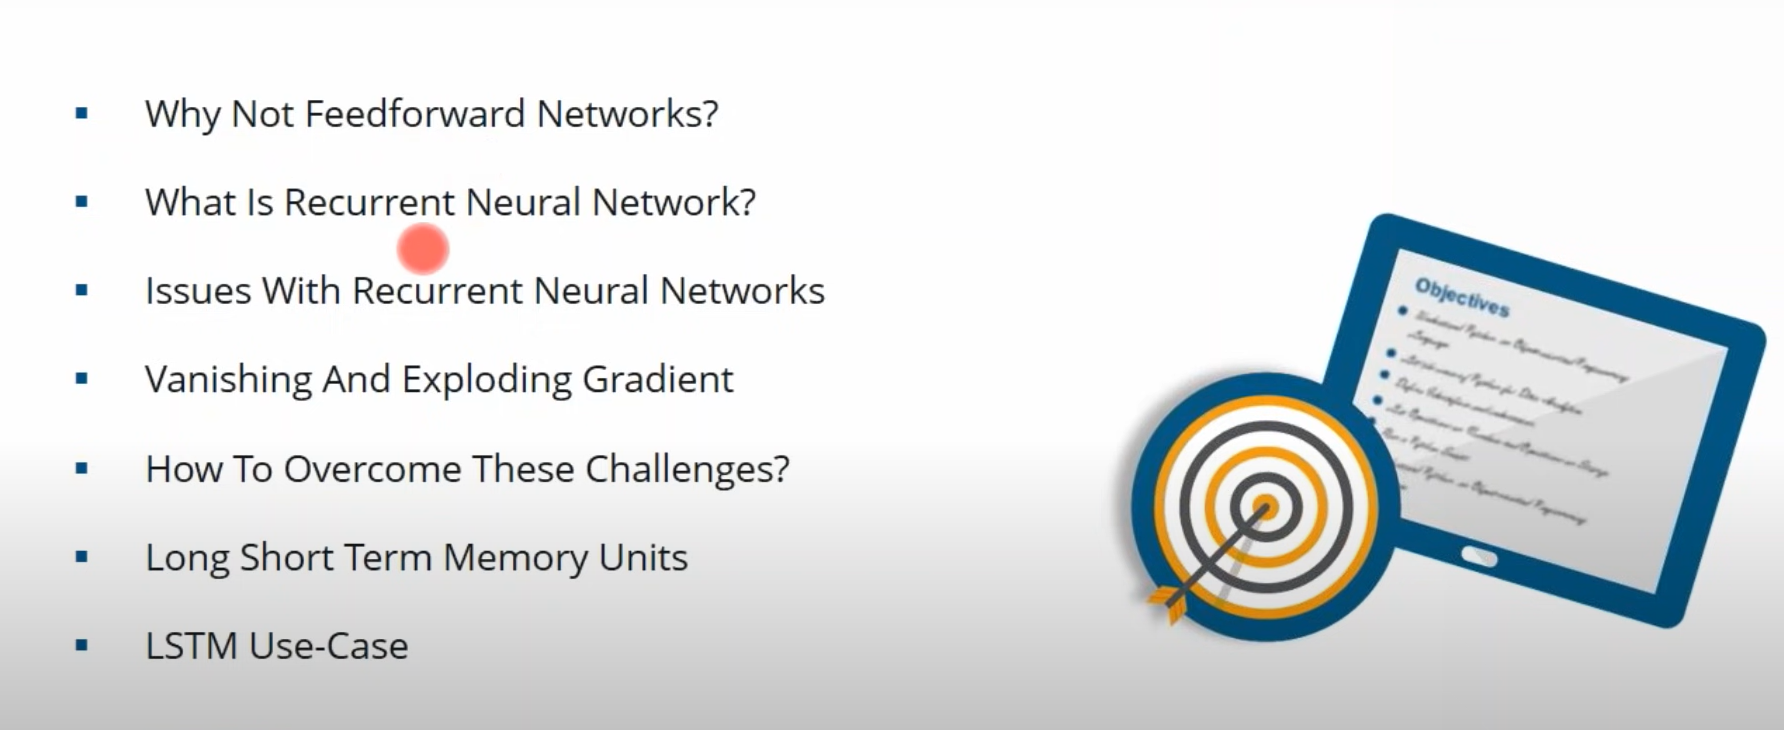

Convolutional neural network is better than a feed-forward network

    CNN has features parameter sharing and dimensionality reduction.  
    The dimensionality reduction in CNN, the computational power needed is reduced. 

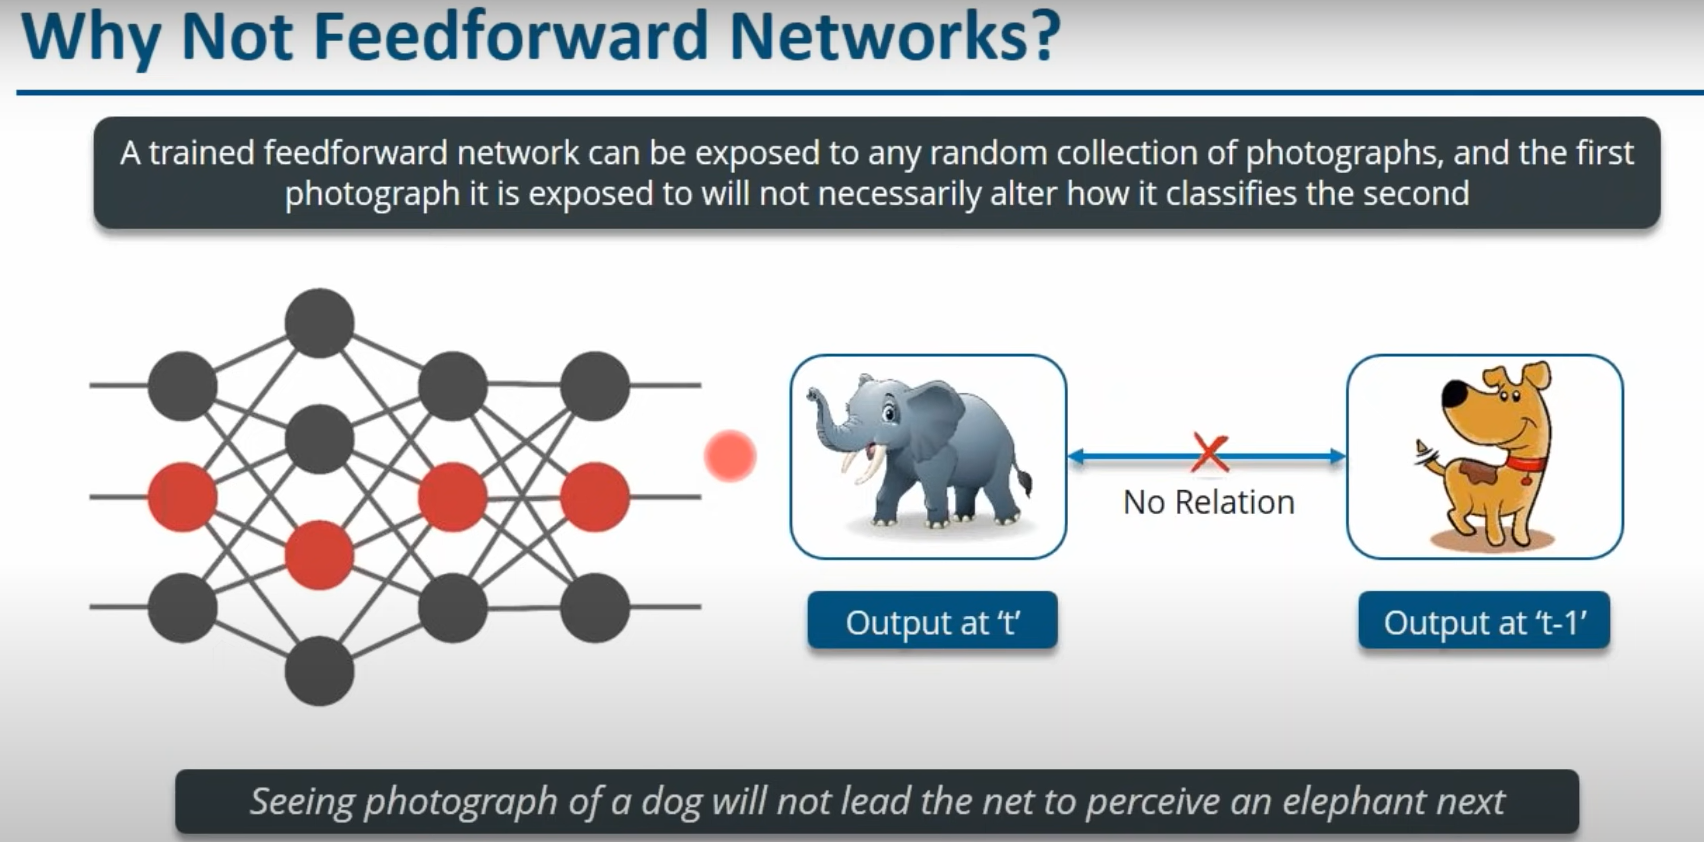

OUTPUT IS INDEPENDENT THAT IS OUTPUT AT T HAS NO RELATION WITH OUTPUT AT T-1

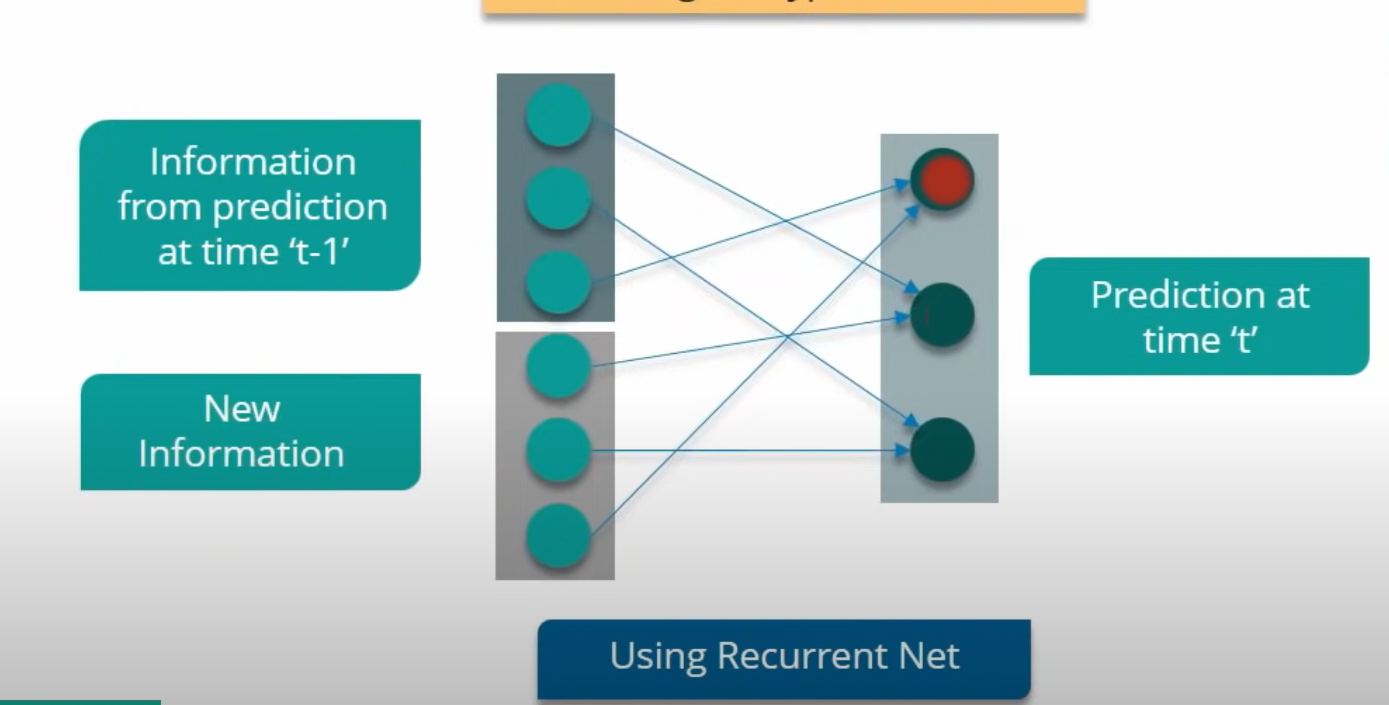

How to overcome the challenges of vanishing  gradient descent
Truncated BTT

Instead of starting backpropogation at the last time stramp, we can choose a smaller time stramp 10 

We will loose the tempora context after the tenth
 
 RELU activation function
 
 RSMprop
  Clip the gradient descent if it goea higher than the threhold
  
  LSTM
  
  Specifically designed to compact these problem

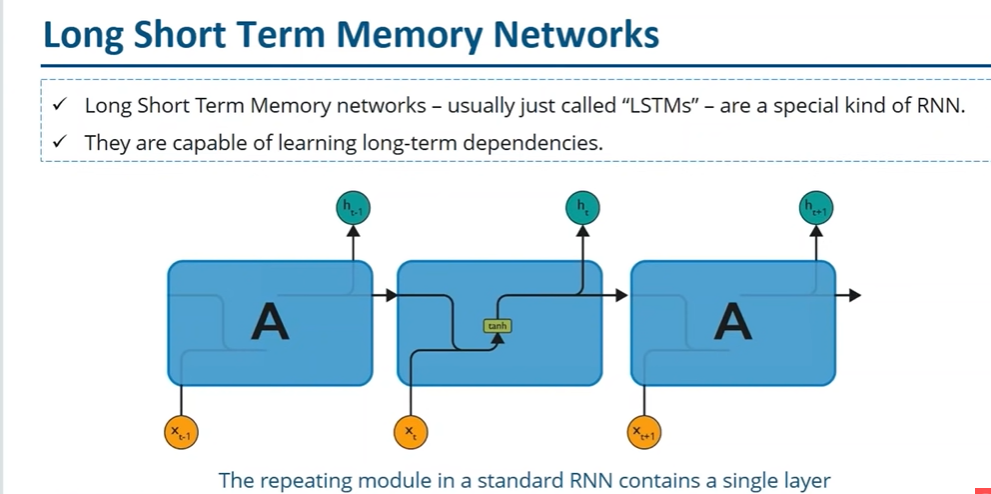

In [3]:
# The key to lstm is the cell state
# the horizontal line running through the cell is cell state


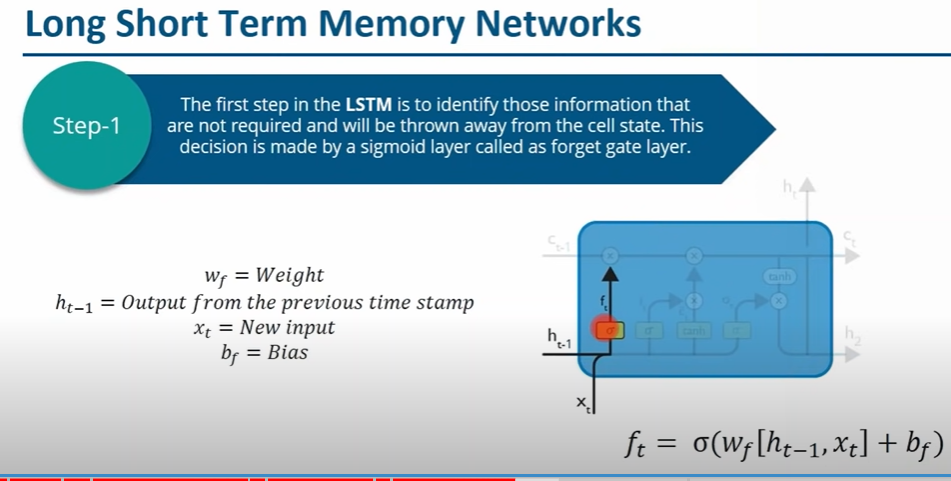

In [4]:
# in the second stage 
#we will look at which information to store
#  it has two parts
# sigmoid and tahn - decide which value to update, tahn that create a vector of candidate values cbar of t-1
# which value be added to x

# in prevous step what information we want to keep
#

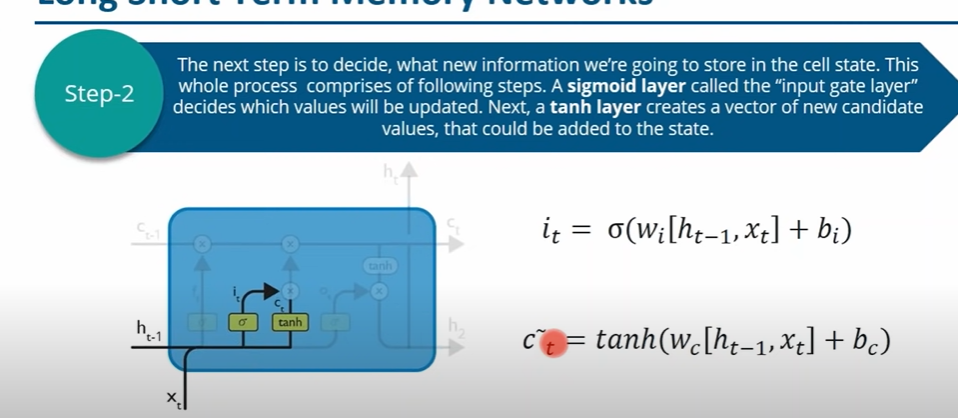

In [1]:
#data collection
import pandas_datareader as pdr

In [2]:
df=pdr.get_data_tiingo('AAPL',api_key='a9bde5ba5eef5fefe597fa643a04f6239462d719')# WE CAN REQUEST 50 TIMES
# A DAY USING THESE API

In [3]:
df.to_csv('AAPL.csv')

In [5]:
#creating the dataframe
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-05-05 00:00:00+00:00,148.96,148.98,146.76,146.76,26787359,35.155130,35.159850,34.635922,34.635922,107149436,0.00,1.0
1,AAPL,2017-05-08 00:00:00+00:00,153.01,153.70,149.03,149.03,48339210,36.110945,36.273788,35.171650,35.171650,193356840,0.00,1.0
2,AAPL,2017-05-09 00:00:00+00:00,153.99,154.88,153.45,153.87,35942435,36.342229,36.552273,36.214787,36.313909,143769740,0.00,1.0
3,AAPL,2017-05-10 00:00:00+00:00,153.26,153.94,152.11,153.63,25670456,36.169946,36.330429,35.898542,36.257268,102681824,0.00,1.0
4,AAPL,2017-05-11 00:00:00+00:00,153.95,154.07,152.31,152.45,25596687,36.481471,36.509908,36.092841,36.126017,102386748,0.63,1.0


In [6]:
df.shape

(1257, 14)

In [8]:
df1=df['close']

In [20]:
df1

0       148.96
1       153.01
2       153.99
3       153.26
4       153.95
         ...  
1253    156.57
1254    163.64
1255    157.65
1256    157.96
1257    159.48
Name: close, Length: 1258, dtype: float64

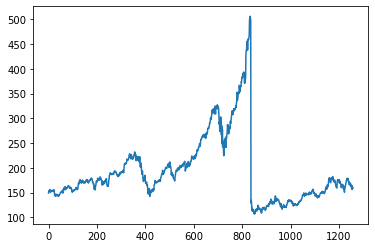

In [22]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [23]:
## LSTM are sensitive to the scale of the data .so we apply minimax

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [30]:
df1

array([[0.10549781],
       [0.11564183],
       [0.11809643],
       ...,
       [0.12726362],
       [0.12804008],
       [0.13184721]])

In [1]:
#splitting the dataset into trian and test data split
print(X_train.shape)

NameError: name 'X_train' is not defined

In [10]:
training_size=int(len(df1)*0.65)
test_data=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
import numpy
# data preprocessing converting into dependent and independent based on timesteps
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [12]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [13]:
# reshape input to be samples ,timesteps,features as required by lstm model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [14]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 282ms/step - loss: 0.0411 - val_loss: 0.0077
Epoch 2/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 3/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0041 - val_loss: 6.7271e-04
Epoch 4/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0017 - val_loss: 2.9658e-04
Epoch 5/100
12/12 [==============================] - 2s 166ms/step - loss: 0.0012 - val_loss: 2.9280e-04
Epoch 6/100
12/12 [==============================] - 2s 156ms/step - loss: 0.0011 - val_loss: 3.3265e-04
Epoch 7/100
12/12 [==============================] - 2s 167ms/step - loss: 0.0010 - val_loss: 3.7110e-04
Epoch 8/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0010 - val_loss: 3.0615e-04
Epoch 9/100
12/12 [==============================] - 3s 212ms/step - loss: 9.6135e-04 - val_loss: 2.8035e-04
Epoch 10/100
12/12 [==============================] - 2s 17

In [46]:
# predict the data with test data
import tensorflow as tf

In [47]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [48]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.7483564969207

In [52]:
 ### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

152.3759804278732

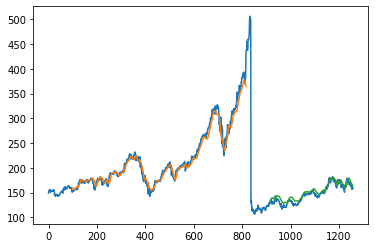

In [53]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
